In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

### Inputs

In [2]:
# Read observed sca
sca = pd.read_csv('HYPE_SCA', sep=' ', index_col=0)

In [3]:
# read hype sca
hype = pd.read_csv('../../model/results/timeCFSC_DD.txt', sep='\t',skiprows=1, index_col=0)

In [4]:
# read modified shapefile
gdf = gpd.read_file('../../geospacial/shapefiles/modified_shapefiles/Modified_SMMcat.shp')

### Analysis

In [5]:
# Rename the index name to None (no name)
hype.index.name = None
sca.index.name = None

In [6]:
# Set the headers to integers skipping the index header
hype.columns = hype.columns.astype(int)
sca.columns = sca.columns.astype(int)

In [7]:
# Convert index to datetime for hype DataFrame
hype.index = pd.to_datetime(hype.index)

# Convert index to datetime for sca DataFrame
sca.index = pd.to_datetime(sca.index)

In [8]:
# Trim hype DataFrame to have matching index as sca
hype = hype.reindex(sca.index)

In [9]:
# Sort the columns of hype DataFrame to match the order of columns in sca
hype = hype.reindex(sorted(sca.columns), axis=1)

In [10]:
# Get the columns of `sca` DataFrame and use them to reorder columns of `hype` DataFrame
hype = hype.reindex(columns=sca.columns)

In [11]:
# Create a new DataFrame `difference` by subtracting `sca` from `hype`
# change this operation to whatever you want
difference = ((hype - sca) / ((hype + sca) / 2)) * 100

In [12]:
# Calculate the mean of each column in the difference DataFrame
column_means = difference.mean()

In [13]:
# Convert column_means Series to a DataFrame
column_means_df = pd.DataFrame(column_means, columns=['Mean'])

In [14]:
column_means_df

,Mean
58219,-51.758467
58241,-44.272471
58237,-54.678789
58232,-35.876219
58214,-92.604177
...,...
58610,61.692943
58389,51.938891
58570,69.189102
58579,77.060463


### Plot a heatmap

In [15]:
# Merge column_means_df onto gdf by the index in column_means_df and seg_nhm column in gdf
merged_gdf = gdf.merge(column_means_df, left_on='seg_nhm', right_index=True)

NameError: name 'cbar' is not defined

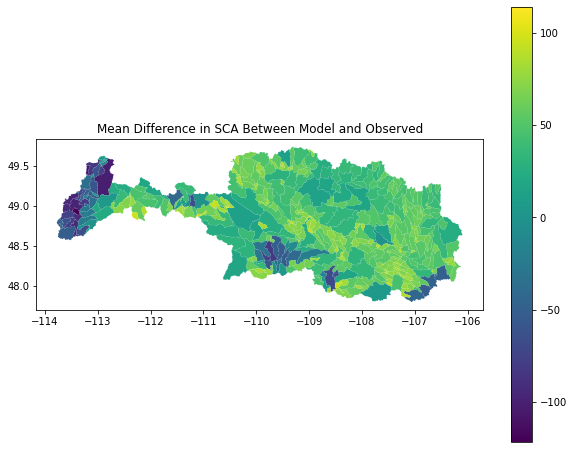

In [16]:
# Plot a heatmap of the 'Mean' column with adjusted figure size
ax = merged_gdf.plot(column='Mean', cmap='viridis', legend=True, figsize=(10, 8))

# Add title to the plot
ax.set_title('Mean Difference in SCA Between Model and Observed')

# Add units to the color bar
cbar.set_ylabel('%')

# Show the plot
plt.show()
